# Visualizing Predictive Models for Users

Welcome to `Heart AI`, the latest and greatest dating app start-up. We're building a machine learning model to predict which user to match with which other user in speed dating events. We've gathered some existing data from a few in-person speed dating events, in which participants record their hobbies, demographic details, and level of interest in other participants they've met. Before we engineer the back-end, we'd like you, our resident Human-AI Interaction expert, to implement a few sample visualizations so we know what features to support.

## The Data 
`dates.csv` contains 8,378 entries from our pilot test data at heterosexual speed dating events at Columbia University from 2002-2004. In these events, each participant met each of all opposite-gender participants for four minutes. The number of speed dates dates varied by the event, on average there were 15, but it could be as few as 5 or as many as 22. Afterward, each participant was asked if they would like to meet any of their speed dating partners again. They also provided ratings on six **attributes** about each speed date:

- Attractiveness
- Sincerity
- Intelligence
- Fun
- Ambition
- Shared Interests

The dataset also includes varying participants' perspectives on those attributes, along with other demographic information and hobbies as described below. 

Each row of the dataset is a speed date, and since participants have multiple dates, they appear in the dataset multiple times. Each column is described below:

| Column Header       | Description     |
| :------------- |  ----------: | 
|  iid | Numerical ID unique to this person   |
| gender   | This participant's self-reported gender (f = female)|
| age | Age in years of this participant |
| race | This person's race |
| field | This person's field of study |
| income | The median household income of the zipcode where this person grew up |
| from | Where this person is originally from |
| tot_rounds | The total number of speed dating rounds (i.e., num speed dates)
| round_num | Index of which speed date of the event (first, second , third...)|
| pid | The partner's unique numerical ID |
| age_partner | The partner's age |
| race_partner | The partner's race |
| same_race | Whether this participant and the partner are the same race (y = yes)|
| request | This participant would like to meet this partner in a follow-up date |
| request_partner | The partner would like to meet this partner in a follow-up date |
| match | Both participants would like a follow-up meeting |
| like | How much this person liked this partner |
| prob_yes | This person's self-reported probability the partner will say yes to a 2nd date |
| like_partner | How much the partner liked this person |
| prob_yes_partner | The partner's probability this person will say yes to a 2nd date |

The next 5 columns all relate to the six attribute ratings listed above: how the participant rated themself. You can find the attribute ratings for how each participant rated their partner, and how the partner rated the participant in the `data/dates_large.csv` file, if you need them:

| Attribute Header       | Description     |
| :------------- |  ----------: | 
| attractive_self | Rating of Attractiveness this person gave them self |
| sincere_self | Rating of Sincerity this person gave them self |
| intelligence_self | Rating of Intelligence this person gave them self |
| fun_self | Rating of Fun the partner this person gave them self |
| ambitious_self | Rating of Ambition this person gave them self |
| attractive | Rating of Attractiveness this person gave to their partner |
| sincere | Rating of Sincerity this person gave to their partner |
| intelligence | Rating of Intelligence this person gave to their partner |
| fun | Rating of Fun this person gave to their partner |
| ambitious | Rating of Ambition this person gave to their partner |
| shared_interests | Rating of Shared Interests this person gave to their partner |
| attractive_partner | Rating of Attractiveness the partner gave to this person |
| sincere_partner | Rating of Sincerity the partner gave to this person |
| intelligence_partner | Rating of Intelligence the partner gave to this person |
| fun_partner | Rating of Fun the partner gave to this person |
| ambitious_partner | Rating of Ambition the partner gave to this person |
| shared_interests_partner | Rating of Shared Interests the partner gave to this person |

The next 17 columns are the participant's answer to the question _"How **interest**ed are you in the following activities, on a scale of 1-10?"_: sports (Playing sports/ athletics), tvsports (Watching sports), excercise, dining (Dining out), museums (Museums/galleries), art, hiking (Hiking/camping), gaming, clubbing (Dancing/clubbing), reading, tv (Watching TV), theater, movies, concerts (Going to concerts), music, shopping, and yoga (yoga/meditation). The numerical answers to these questions are recorded in the last 17 columns with the column head appended with `_num`. The low, moderate, high categories were determined based on quartiles: less than quartile 1 = `low`, less than quartile 3 = `moderate`, otherwise `high`. 



---

---

---

## Part 1: Explore & Visualize 
_50% of the total effort on this assignment._

The goal of these tasks are to experiment with different ways of visualizing data. Show your work in code as well as your final visualizations in this notebook. Include answers to all questions.

If you’ve never visualized in Python, here are some helpful resources, **review** these first!
- The `pandas` module has some visualization support: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html 
- You can also use Matplotlib, which is incredibly powerful: https://matplotlib.org/gallery/index.html 

_Remember_, if you're going to borrow and adapt code from a resource likes these, make sure you know what the code is doing before you adapt it. That way you get meaningful outcomes, rather than illegible graphs and data!


In [293]:
import pandas as pd # import pandas library
df_large = pd.read_csv('data/dates_large.csv', low_memory=False)
df = pd.read_csv('data/dates.csv', low_memory=False) # read the csv file into a pandas dataframe object

Recall from Assignment 1 the data exploration methods from the `pandas` module we used previously:

- `df.head()` will show us the first 5 rows of our dataset. You can also specify the first N rows, like `df.head(18)` will show us the first 18 rows.
- `df.sample(10)` will show us 10 randomly sampled rows of our dataset
- `df.shape` will tell us how many rows and how many columns are in the dataset
- `df.columns` will list the names of all columns in the dataset
- `df.describe()` will give you summary statistics about all numerical columns in the dataset

_Actually_, you'll need to recall many things from Assignment 1. Maybe take a few minutes to review it!

In [294]:
#print(df.min()) # 55 is maximum age 18 is minimum age
#df.loc[:,["race"]]
df.race.unique()
#AsianOrAsianAmericanOrPacificIslander
#WhiteOrCaucasianAmerican

'AsianOrAsianAmericanOrPacificIslander'
'WhiteOrCaucasianAmerican'
'LatinoOrHispanicAmerican'
'BlackOrAfricanAmerican'

df_no = df['attractive_self']
#df_no = df_no[df_no['request_partner'] == 'y']
#print(df_no.head)
print(df_no.head)

<bound method NDFrame.head of 0       6.0
1       6.0
2       6.0
3       6.0
4       6.0
       ... 
8373    8.0
8374    8.0
8375    8.0
8376    8.0
8377    8.0
Name: attractive_self, Length: 8378, dtype: float64>


### Task 1a. Create a histogram of speed date participant counts by age. 
_5% effort._

A [histogram](https://en.wikipedia.org/wiki/Histogram) shows _counts_ of values in a bar chart form. This histogram will let us see if most of the participants are younger or older. One axis should be a sorted continuous range of the youngest person in the dataset to the age of the oldest person in the dataset. The other axis should be the counts for each age. Remember your axes labels! 

_Hint_: Recall each row of the data is a speed date, not one person (`iid`). Each person will appear in the dataset 5 to 22 times. You may want to look into [`pandas drop_duplicates()`](https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/) so you don't double/quintuple count anyone!

_Hint_: You may need to `import matplotlib.pyplot as plt` and use `plt.xlabel` and `plt.title` methods to add labels to your histogram. This works even for the `pandas DataFrame.hist` method!

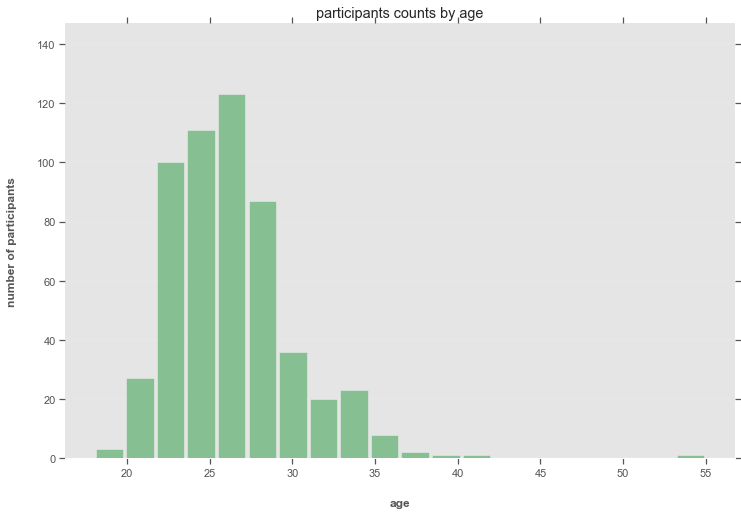

In [295]:
# Python code that creates the described histogram:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
pd.options.plotting.backend = 'matplotlib'

df1 = df.drop_duplicates(subset=['iid'])

ax = df1.hist(column='age', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine because I think it looks better this way
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("participants counts by age")

    # Set x-axis label
    x.set_xlabel("age", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("number of participants", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))\
    

### Task 1b. Create a histogram of participant counts by age, split by gender. 
_8% effort._

This histogram will show us the distribution of speed dating participants by age, one histogram for each gender in the dataset.

_Hint_: It may make sense to reuse the dataframe plotted from Task 1a, but perhaps add an informative column. When using `pandas DataFrame.hist()` method, these two histograms can be generated with ~1 line of code + [a few lines extra to add axes labels](https://stackoverflow.com/questions/42832675/setting-axis-labels-for-histogram-pandas) + 1 line to `ax.set_ylim((0,UPPER_Y_LIMIT))` and set the y-axes labels to be the same.

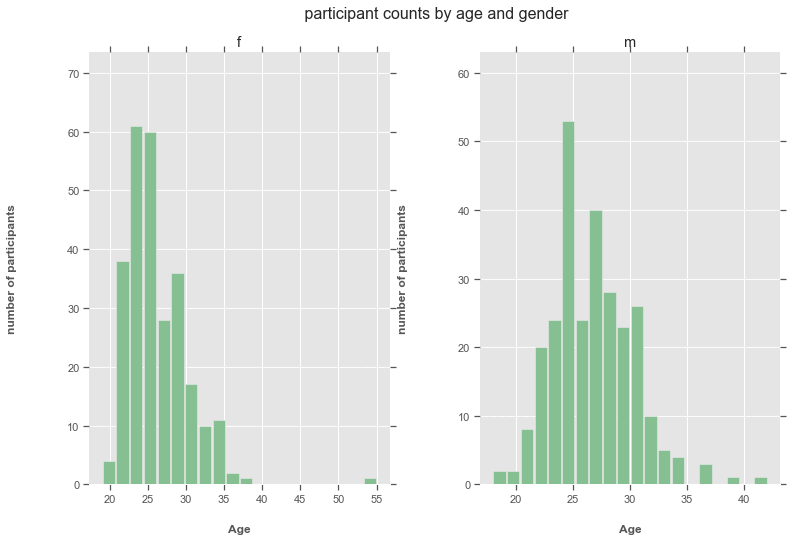

In [296]:
# Python code that creates the described histogram:
# Python code that creates the described histogram:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

pd.options.plotting.backend = 'matplotlib'
df1 = df.drop_duplicates(subset=['iid'])

ax = df1.hist(column='age', bins=20, by='gender', grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.suptitle(" participant counts by age and gender", size=16)
for i,x in enumerate(ax):

     # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("number of participants", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)
    

When shown data or an ML model, humans tend to have _confirmation bias_, meaning that they tend to believe that whatever the data or model says is what they really thought all along. Ever broke up with a significant other and your friends tell you "I told you so"? This is confirmation bias. With Bayesian reasoning, we can take into account a viewer’s prior reasonable guess before they see data. This is a good technique to help users reflect on how the data might conflict with "what they thought all along." 

### Task 1c. Record prior: female ages --> successful matches.
_2% effort._

Write down what you believe (before looking at the data. Just guess!) is the relationship between female participant age and number of successful matches. Do you expect successful matches to be the same across all ages or higher in certain age ranges? Why?

_Hint:_ Do we have any information that can inform our priors?

**ANSWER:** I think that the number of female participants' successful matches is negatively correlated with their age, because we know that most men, whether young or old, usually prefer younger women.

### Task 1d. Record prior: male ages --> successful matches.
_2% effort._

Write down what you believe (before looking at the data. Just guess!) is the relationship between male participant age and number of successful matches. Do you expect successful matches to be the same across all ages or higher in certain age ranges? Why?

_Hint:_ Do we have any information that can inform our priors?

**ANSWER:** I think that women are more comfortable with someone close to their own age or slightly older, so I'd expect the number of matches to generally go up the older men are, especially that the oldest age in this data set is 55. 

### Task 1e. Generate histograms of priors.
_5% effort._

1. Create a histogram of successful matches female participants had by age. 
2. Create a histogram of successful matches male participants had by age. 

We're now interested in data at the match level, rather than the individual level. If you previously dropped duplicate `iid`s, you may want to update your data to include them so you can count _every_ match, not just the first one!

_Hint_: You might find it helpful to figure out how to [filter out values by a conditional using pandas](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).

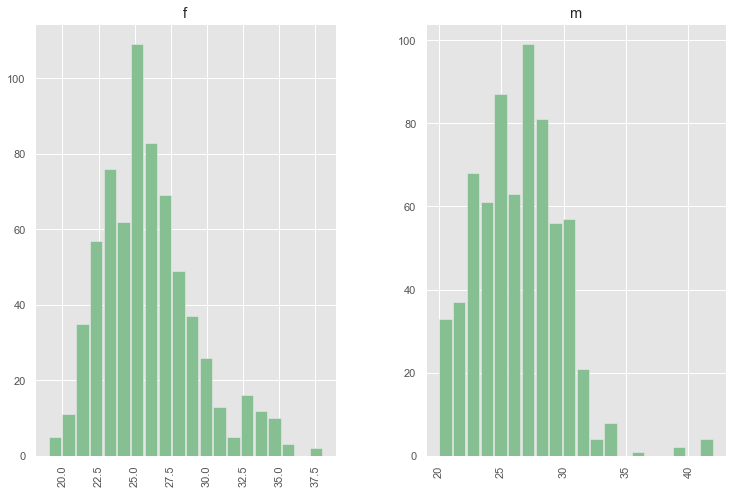

In [297]:
# Code that generates histograms 1 & 2:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.plotting.backend = 'matplotlib'

df_e = df
df_e = df_e[df_e['match'] == 'y']
ax = df_e.hist(column='age', bins=20, by='gender', grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


### Task 1f. Compare priors with histograms.
_8% effort._

Compare your prior guess in 1c and 1d to the histograms in 1e. What did you learn from the histograms? Are there parts of your prior guess that were confirmed by the histograms? Are there parts of your prior guess that were wrong or different than you expected?

_Hint:_ Think critically about the data, and whether the histograms we built are adequate for supporting/disproving our priors.

**ANSWER:** _Double click this text to write your answer to the question here._

When users see different possibilities separately in a data or ML system, there’s a bias towards thinking _all possibilities are equally likely_, when really some options are more or less probable in real life. e.g., While a headache could be caused by autumn allergies or by brain cancer, the likelihood of allergies is far higher in real life than brain cancer.

### Task 1g.
_20% effort._

Create a visualization of _your choice_, allowing users to examine how different personal features correlate with successful matches with increasing age. Overlay 4 different participant demographics in the same plot, with age as the x-axis and including only data from successful matches. Design this visualization however you wish. Justify your design by writing a few sentences about how your visualization will help users compare the 4 different attributes by age. Talk about encoding choices such as: plot type, use of size, color, and axes labels. Are there any flaws in your visualization?

_Examples_: This could be a stacked histogram showing the number of successful matches by the 4+ participant races in the dataset, or it could be the mean of 4 different interests overlayed in the same line chart, or you could look at the self-ratings along the attributes, or you could consider adding columns to the dataset that might provide additional insights! Explore the data and generate something interesting to you!

_Hint_: You **must** organize your data into a format similar to what you want the visualization to show. The [pandas `DataFrame.groupby`](https://www.geeksforgeeks.org/pandas-groupby/) method can be very useful here!

_Hint_: Is it okay for each participant to appear in the data repeatedly (i.e., 5-22 times) for this plot?

**ANSWER:** _Double click this text to write your answer to the question here._

<AxesSubplot:xlabel='age'>

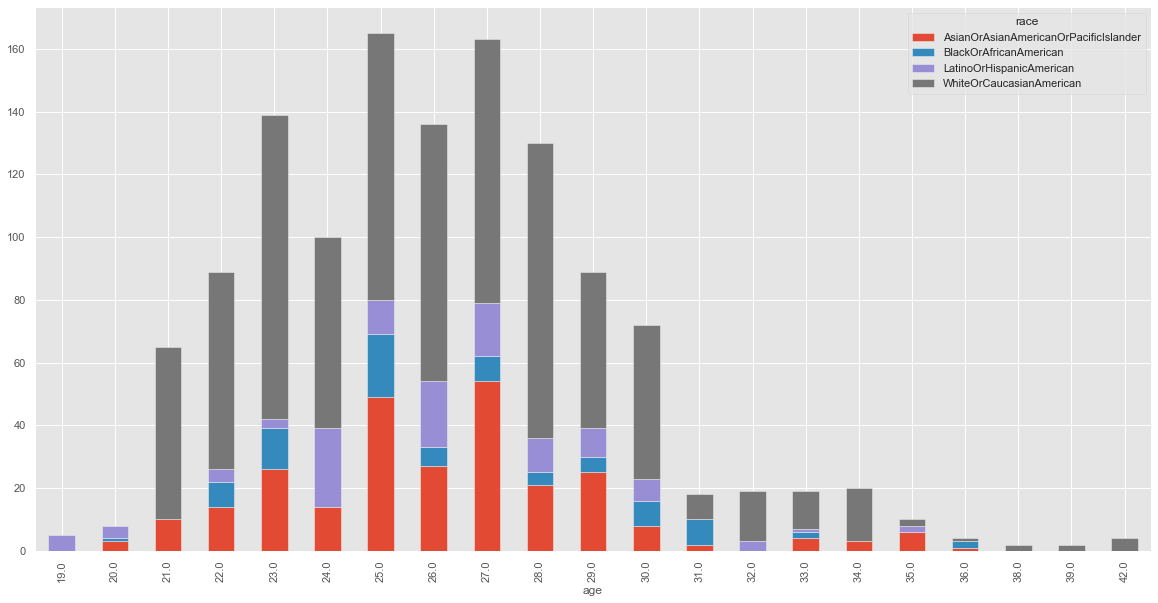

In [298]:
# Code that generates your visualization: WORK IN PROGRESS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import timeit

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.plotting.backend = 'matplotlib'

df_mor = df
overlay_data = df_mor[df_mor['match'] == 'y']
df3 = overlay_data[(overlay_data["race"] == "Other")].index 
#removing "Other" race section"
overlay_data.drop(df3, inplace = True)
#overlay_data = df_mor[df_mor['race'] == 'BlackorAfricanAmerican']
overlay_data = overlay_data.groupby(['age', 'race'])['age'].count()
overlay_data.unstack().plot(figsize=(20,10), kind='bar', stacked=True)

#############
# maybe request partner is more important 
# also maybe we just have more white people in our group ?



---

---

---

## Part 2: Designing Personal Predictions
_50% of the total effort on this assignment._

The goal of Part 2 is to start designing an interactive interface, where a user that comes to the `Heart AI` visualization can put in their own information (like age, gender, interests, self-perceived attributes, and so on), and see how their information relates to the possibility of a successful speed date match. 

Show your work in code as well as your final visualizations in this notebook. Include answers to all questions.

The best assignments will have _at least_ one interactive information visualization. To add some minimal interactivity with minimal effort, consider using Jupyter Notebook Widgets: 
- https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html 
- https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
- https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html


### Task 2a. Design for personas. 
_20% effort._

For each of the fictional users given, create a single visualization that provides insight into that user's likely experience at a speed dating event. To experiment with design choices, make each user/visualization pair a different visual encoding that represents different design choices (e.g. try a different plot type for each user group). 

- Morgan is a young black male college student studying Law. 
- Taylor is a 27 year old woman. She greatly enjoys reading and yoga.
- Cal is a white man in his late 20s, who believes he's moderately attractive.
- Reilly is a Psychologist of non-binary gender, who realllly doesn't like going to art museums.

This task may require creativity in how you select your data to be relevant to the selected persona! It may also require creativity in selecting which data to vary/plot in the information visualization. Ideally, these visualizations would all be interactive, but as a minimal requirement, try to make at least one visualization interactive. For those that are static, you might have to think more carefully about what to display!

_Hint_: If the demographic detail for the user is missing from the description, then it could be a good candidate for displaying "What-if" scenarios along that dimension. If it is provided, you could consider showing how slight changes in that information might impact success.

In [299]:
# Code that generates a visualization for Morgan:


#iris' advice : keep one or two dimensions fixed and give the user smth they can vary
    # could expand age group
    # mid twenties, late thirties etc
    # information not provided 
    # == making sample larger 
    # think critically about the user, data, design choices and reasoning behind them

#races :
    #'AsianOrAsianAmericanOrPacificIslander'
    #'WhiteOrCaucasianAmerican'
    #'LatinoOrHispanicAmerican'
    #'BlackOrAfricanAmerican'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets 
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn as sns
import pandas as pd
import pandas_bokeh
from ipywidgets.widgets import Dropdown, Button
from ipywidgets.widgets import Layout, HBox, VBox
import pandas as pd
import random
import string

pd.options.plotting.backend = 'matplotlib'


df_morr = df

def participantsintheir(overlay_dataa, x):
    ax = overlay_dataa[(overlay_dataa['age'] == x)|
    (overlay_dataa['age'] == x+1) |
    (overlay_dataa['age'] == x+1) |
    (overlay_dataa['age'] == x+3) |
    (overlay_dataa['age'] == x+4) |
    (overlay_dataa['age'] == x+5) |
    (overlay_dataa['age'] == x+6) |
    (overlay_dataa['age'] == x+7) |
    (overlay_dataa['age'] == x+8) |
    (overlay_dataa['age'] == x+9)]
    
    return ax


overlay_data = df_morr[df_morr['match'] == 'y']
overlay_data = overlay_data[overlay_data['gender'] == 'm']

dfdrop = overlay_data[(overlay_data['race'] == "Other")].index 
dfdrop1 = overlay_data[(overlay_data['race'] == "LatinoOrHispanicAmerican")].index 
dfdrop2 = overlay_data[(overlay_data['race'] == "WhiteOrCaucasianAmerican")].index 
dfdrop3 = overlay_data[(overlay_data['race'] == "AsianOrAsianAmericanOrPacificIslander")].index 

#removing "Other" race section and "unsuccessful matches"
overlay_data.drop(dfdrop, inplace = True)
overlay_data.drop(dfdrop1, inplace = True)
overlay_data.drop(dfdrop2, inplace = True)
overlay_data.drop(dfdrop3, inplace = True)

def myfunction(x): 
    if x == 'field' :
        pd.options.plotting.backend = 'matplotlib'
        overlay_data.hist(column='age', by='field', bins=20, grid=False, figsize=(12,8), zorder=2, rwidth=0.9)
    if x == 'race':
        pd.options.plotting.backend = 'matplotlib'
        N, bins, patches = overlay_data.hist(column='age', bins=20, by='race_partner', grid=False, figsize=(12,8), zorder=2, rwidth=0.9)
        plt.show()

    if x == 'overlay': 
        pd.options.plotting.backend = 'matplotlib'
        plt.style.use('ggplot')
        overlay_data_20s = participantsintheir(overlay_data, 20)
        overlay_data2 = overlay_data_20s.groupby(['field', 'race_partner'])['race_partner'].count()
        overlay_data2.unstack().plot(figsize=(20,10), kind='bar', stacked=True)
        plt.legend(loc='upper right')
        plt.title('field of participants in their 20s and race of their partner', fontsize = 20)
        plt.xlabel('Field')
        plt.ylabel("Partner's race")
        plt.tight_layout()
    return 
        
interact(myfunction, x=['field','race', 'overlay']); 



interactive(children=(Dropdown(description='x', options=('field', 'race', 'overlay'), value='field'), Output()…

In [300]:
# Code that generates a visualization for Cal:
#Cal is a white man in his late 20s, who believes he's moderately attractive.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm      
from matplotlib.widgets import Slider
import panel as pn
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


pd.options.plotting.backend = 'matplotlib'

def participantsintheir(overlay_dataa, x):
    ax = overlay_dataa[(overlay_dataa['age'] == x)|
    (overlay_dataa['age'] == x+1) |
    (overlay_dataa['age'] == x+1) |
    (overlay_dataa['age'] == x+3) |
    (overlay_dataa['age'] == x+4) |
    (overlay_dataa['age'] == x+5) |
    (overlay_dataa['age'] == x+6) |
    (overlay_dataa['age'] == x+7) |
    (overlay_dataa['age'] == x+8) |
    (overlay_dataa['age'] == x+9)]
    
    return ax

global dfMatch 
dfMatch = overlay_data_cal
print("Select your range of rating of your self-attractiveness")
def f(minRating, maxRating):
    if minRating>maxRating :
        print("please adjust Min Rating to be lower than or equal to Max rating")
        
    dfMatch= overlay_data_cal[overlay_data_cal['gender'] == 'm']
    dfMatch= dfMatch[dfMatch['match'] == 'y']
    dfMatch = dfMatch[dfMatch['race'] == 'WhiteOrCaucasianAmerican']
    dfMatch = participantsintheir(dfMatch, 25)
    dfMatch = dfMatch[(dfMatch['attractive_self'] >= minRating)]
    dfMatch = dfMatch[(dfMatch['attractive_self'] <= maxRating)]
    dfMatch = dfMatch.groupby(['attractive_self', 'match'])['attractive_self'].value_counts()
    dfMatch.unstack().plot(figsize=(20,10), kind='bar', stacked=True)
    plt.title(" White men in their late 20s and early 30s : \n Self-attractiveness rating and the number of their matches")
    
interact(f, minRating=(0,10), maxRating=(0,10));

Select your range of rating of your self-attractiveness


interactive(children=(IntSlider(value=5, description='minRating', max=10), IntSlider(value=5, description='max…

In [301]:

# Taylor is a 27 year old woman. She greatly enjoys reading and yoga.

#ideas :

    # i want to show her how many people are reallyyy interested in both yoga and reading 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm      
from matplotlib.widgets import Slider
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

def participantsintheir(overlay_dataa, x):
    ax = overlay_dataa[(overlay_dataa['age'] == x)|
                    (overlay_dataa['age'] == x+1) |
                    (overlay_dataa['age'] == x+1) |
                    (overlay_dataa['age'] == x+3) |
                    (overlay_dataa['age'] == x+4) |
                    (overlay_dataa['age'] == x+5) |
                    (overlay_dataa['age'] == x+6) |
                    (overlay_dataa['age'] == x+7) |
                    (overlay_dataa['age'] == x+8) |
                    (overlay_dataa['age'] == x+9)]
    return ax

overlay_datat = df

#female data 

overlay_data_female = overlay_datat[overlay_datat['gender'] == 'f']
overlay_data_female = overlay_data_female[overlay_data_female['reading'] == 'high']
overlay_data_female = overlay_data_female[overlay_data_female['yoga'] == 'high']
overlay_data_female = overlay_data_female[overlay_data_female['request_partner'] == 'y']

#male data
overlay_data_male = overlay_datat[overlay_datat['gender'] == 'm']
overlay_data_male = overlay_data_male[overlay_data_male['reading'] == 'high']
overlay_data_male = overlay_data_male[overlay_data_male['yoga'] == 'high']

plt.show()   
    
age20 = participantsintheir(overlay_data, 20)

#print(overlay_data_female['match']=='no')
global overlay_data_female
overlay_data_female = participantsintheir(overlay_data_female, 20)

import pandas as pd
pd.options.plotting.backend = "plotly"

def myfunction(x): 
    if x == 'women who love reading and yoga' :
        pd.options.plotting.backend = "plotly"
        overlay_data_female2 = overlay_data_female
        overlay_data_female2 = overlay_data_female2.groupby(['age', 'match'])['match'].count()
        plt = overlay_data_female2.unstack().plot(kind='bar')
        plt.show()
      
    if x == 'men who love reading and yoga':
        pd.options.plotting.backend = "plotly"
        overlay_data_male2 = overlay_data_male
        overlay_data_male2 = overlay_data_male2.groupby(['age', 'request_partner'])['request_partner'].count()
        plt = overlay_data_male2.unstack().plot(kind='bar')
        plt.show()
      
    return 
        
interact(myfunction, x=['women who love reading and yoga','men who love reading and yoga']);



interactive(children=(Dropdown(description='x', options=('women who love reading and yoga', 'men who love read…

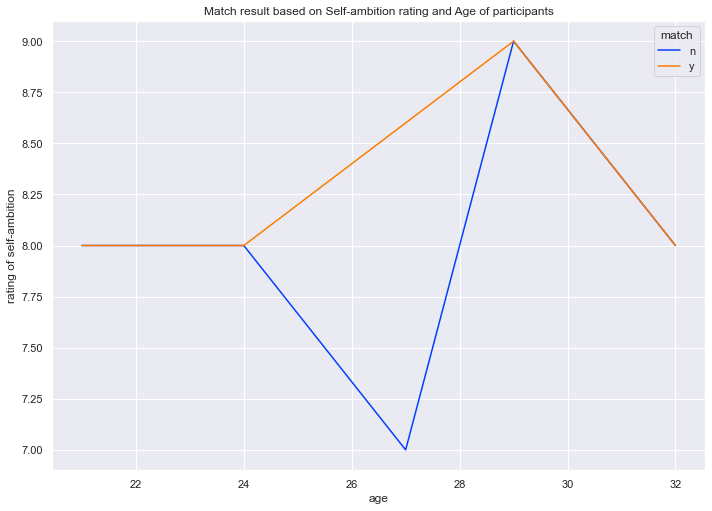

In [302]:
# Code that generates a visualization for Reilly:
##Reilly is a Psychologist of non-binary gender, who realllly doesn't like going to art museums.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.plotting.backend = 'matplotlib'
overlay_data_r = df
overlay_data_r = overlay_data_r[overlay_data_r['museums']=='low']
overlay_data_r = overlay_data_r[overlay_data_r['field']=='Psychology']

##print(overlay_data_r['age'].sample(75).unique())
        ### only 75 people matching the above criteria 
        ### also we ONLY have the ages : 32. 27. 21. 24. 29 !!
        
overlay_data_r = overlay_data_r.groupby(['age', 'match', 'ambitious_self'])['age'].count()

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(data=overlay_data_r, x='age', y='ambitious_self', hue = 'match', palette="bright")
ax.set(xlabel='age', ylabel='rating of self-ambition')
ax.set_title("Match result based on Self-ambition rating and Age of participants")
plt.show()

### Task 2b. Which visualization from 2a do you think is the most successful design? What visualization techniques did you use? 
_3% effort._

**ANSWER:** 
I think Taylor's visualization is the best one out of all four, because not only she has an idea about how the dating experience was for people who have a similar profile as hers (at least based on the information we have : woman, 27, reading and yoga == high), but she can also see if people from the opposite gender who also share her interests requested their partners or not (I was thinking this will give her an idea about how often "people she might be interested in" match with their partners, especially those her age). I also made the age sample larger and included people in their 20s and not just those who are 27. Moreover, she can zoom in and out on different bars (ages), as well as put the mouse on a certain color/bar to get a clearer description of what's going on there.
- but I am also assuming she likes men so if she doesn't, this data could be completely irrelevent to her ;-; 

### Task 2c.  Limitations
_7% effort._

Given your visualizations in 2a, what would be good questions for a user to ask a personalized visualization from this dataset? What would be some questions that a personalized visualization (with this dataset alone) cannot answer?

**ANSWER:** 

**Questions that users can ask for a personalized visualization from this data set:**
- how many people requested a partner from my race/gender?
- how many people have shared interests with them ?
- what feature/trait got the best rating from a partner who matched with a participant from a similar background
    
**What would be some questions that a personalized visualization (with this dataset alone) cannot answer?**    
- their sexual orientation 
- We don't know what they (features) prioritize when they're looking for in a partner
- we're showing them people based on similar interests but sometimes that isn't a factor of a successful relationship, sometimes "opposites attract"
- we don't know if they're looking for a serious relationship or a casual one         

### Task 2d. Best information.
_7% effort._

If users like those in 2a visit the `Heart AI` interactive tool, what information would you have them put in to show the most relevant match success visualization and why?

**ANSWER:** 
- we don't have the sexual orientation/pronouns for all of them, so I would ask about that
- what features/traits matters the most to them -- do they want another law person ? are they open to dating  outside their race?
- age range of people they're interested in
- type of relationship they're looking for/intentions
- religion & do they want to date someone from the same one or does it not matter?

### Task 2e. Data processing.
_3% effort._

In the given data, Interest information is pre-binned as low, moderate, high. Is there any other data in this dataset that could be helpful to bin the data? How would you bin it?

**ANSWER:** 


- I think some data could also be binned but I don't know if it would be better to do so. Income is one that could be binned as low, moderate or high, but by the standard of that depends on the field, city/state, and also it is relative so I don't think there's a good standard measure to bin it. Also, we could do the one-hot encoding for some data (race for example), to make predicitions easier when building our model.

### Task 2f. Data use.
_10% effort._

Is the data used in this activity a good choice for `Heart AI`'s pilot testing? Why/Why not? How might it be improved?

**ANSWER:** 
- I think it is good but could be improved. I liked that we had both the self-rating and the partner rating, so that we can compare people's perceptions of themselves and how they might impact the outcome of the date, but I think because we have so many features, it becomes hard to know which feature actually had an impact on the outcome, so maybe having another feature where participants can indicate which feature they liked the best/the least about their partner and (=the one that impacted their decision the most). 
    - also the data should be more inclusive and have more races instead of just Other
    - as well as non-binary and not just gender = female or male
    - sexual orientation
    - what they're looking for (serious/casual relationship etc..)
    - Also, maybe the data is predominately white people do it would be a good idea to normalize it first before building the prediction model, just like we did while building the home loan prediction model where we had the same number of 0s and 1s in a dataset.

---

---

---

## Submit your Assignment
Once you've completed all of the above, you're done with assignment 3! You might want to double check that your code works like you expect. You can do this by choosing "Restart & Run All" in the Kernel menu. If it outputs errors, you should go back and check what you've done. Iris needs to be able to run your notebook on her computer!

Once you think everything is set, please upload your final notebook (with all of your code run and output showing), to Glow with filename `[yourunixID]_haii21[assignmentnumber].ipynb`, e.g., `ikh1_haii21a3.ipynb`

If you've modified your data file outside of this notebook, please zip it up with your Jupyter Notebook and submit together as one `.zip` file so that I can run it!